# Chapter 6: Transfer Learning and Pretrained Models

## 6.2 Learning Objectives

By the end of this chapter, you should be able to:
- understand what is transfer learning
- load pretrained models for computer vision using TorchHub
- preprocess images to make them suitable inputs for models
- run inference on pretrained models using your own images
- build a dataset of images

## 6.3 What is Transfer Learning?

The idea is actually quite simple: some Big Tech company with virtually infinite amounts of data and computing power trains a huge and powerful model and, once the model is trained, it releases the architecture and the corresponding trained weights (the pretrained model itself). Next, everyone can use these weights as a starting point and fine-tune them to fit a different - although similar - purpose of the original model.

## 6.4 Torch Hub

The [Torch Hub](https://pytorch.org/hub/) can be uset to try out and use to quickly run inference on your own data using pretrained models. It is a pretrained model repository designed to facilitate research reproducibility.

### 6.4.1 Listing Models

In [1]:
import torch
repo = 'pytorch/vision:v0.15.2'
entrypoints = torch.hub.list(repo)
entrypoints

Downloading: "https://github.com/pytorch/vision/zipball/v0.15.2" to /root/.cache/torch/hub/v0.15.2.zip
/root/.cache/torch/hub/pytorch_vision_v0.15.2/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: ''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fcn_resnet101',
 'fcn_resnet50',
 'get_model_weights',
 'get_weight',
 'googlenet',
 'inception_v3',
 'lraspp_mobilenet_v3_large',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'r2plus1d_18',
 'r3d_18',
 'raft_large',
 'raft_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1

### 6.4.2 Loading a Model

In [2]:
resnet_help = torch.hub.help(repo, 'resnet50')
print(resnet_help)

ResNet-50 from `Deep Residual Learning for Image Recognition <https://arxiv.org/pdf/1512.03385.pdf>`__.

    .. note::
       The bottleneck of TorchVision places the stride for downsampling to the second 3x3
       convolution while the original paper places it to the first 1x1 convolution.
       This variant improves the accuracy and is known as `ResNet V1.5
       <https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch>`_.

    Args:
        weights (:class:`~torchvision.models.ResNet50_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.ResNet50_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.resnet.ResNet``
            base class. Please refer

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.15.2


In [3]:
untrained_model = torch.hub.load(repo, 'resnet50')
untrained_model

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.15.2


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 6.4.3 Loading Pretrained Weights

In [4]:
model = torch.hub.load(repo, 'resnet50', weights='ResNet50_Weights.DEFAULT')

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.15.2
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 319MB/s]


In [5]:
torch.hub.get_dir()

'/root/.cache/torch/hub'

## 6.5 Computer Vision

Torchvision has many available [models for computer vision](https://pytorch.org/vision/stable/models.html) split among different tasks: image classification (which we're focusing on in this and the next chapter), semanting segmentation, object detection, instance segmentation, person keypoint detection (we'll get back to these in the next part of the course), and video classification (which, unfortunately, won't be covered in this course).

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch4/other_cv_tasks.png)

### 6.5.1 Image Classification

If we check Torchvision's documentation on [image classification models](https://pytorch.org/vision/stable/models.html#classification) we'll see many familiar models once again: [AlexNet](https://pytorch.org/vision/stable/models/alexnet.html), [VGG](https://pytorch.org/vision/stable/models/vgg.html), [ResNet](https://pytorch.org/vision/stable/models/resnet.html), and [Inception V3](https://pytorch.org/vision/stable/models/inception.html).

### 6.5.2 Model

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [6]:
model = torch.hub.load(repo, 'resnet50', weights='ResNet50_Weights.DEFAULT')

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.15.2


In [7]:
from torchvision.models import get_weight

weights = get_weight('ResNet50_Weights.DEFAULT')
model = torch.hub.load(repo, 'resnet50', weights=weights)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.15.2


In [8]:
weights.meta.keys()

dict_keys(['min_size', 'categories', 'num_params', 'recipe', '_metrics', '_ops', '_file_size', '_docs'])

### 6.5.3 Weights' Metadata

In [9]:
categories = weights.meta['categories']
categories[:20]

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee']

In [10]:
weights.meta['num_params']/1e6

25.557032

In [11]:
for s in [18, 34, 50, 101, 152]:
    n_params = get_weight(f'ResNet{s}_Weights.DEFAULT').meta['num_params']/1e6
    print(f'ResNet{s}: {n_params:.2f} million')

ResNet18: 11.69 million
ResNet34: 21.80 million
ResNet50: 25.56 million
ResNet101: 44.55 million
ResNet152: 60.19 million


In [12]:
for s in [18, 34, 50, 101, 152]:
    acc1 = get_weight(f'ResNet{s}_Weights.DEFAULT').meta['_metrics']['ImageNet-1K']['acc@1']
    print(f'ResNet{s}: {acc1}')

ResNet18: 69.758
ResNet34: 73.314
ResNet50: 80.858
ResNet101: 81.886
ResNet152: 82.284


### 6.5.4 Transforms

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step3.png)

In [13]:
transforms_fn = weights.transforms()
transforms_fn

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [14]:
isinstance(transforms_fn, torch.nn.Module)

True

Since it is a PyTorch model, it must implement a `forward()` method, and it looks like this:

```python
def forward(self, img: Tensor) -> Tensor:
    img = F.resize(img, self.resize_size, interpolation=self.interpolation)
    img = F.center_crop(img, self.crop_size)
    if not isinstance(img, Tensor):
        img = F.pil_to_tensor(img)
    img = F.convert_image_dtype(img, torch.float)
    img = F.normalize(img, mean=self.mean, std=self.std)
    return img
```

***
**ASIDE: Images and Channels**

In case you're not familiar with the meaning of channels, pixel values, and how images are represented as tensors, this is a brief overview of these topics.

To illustrate how images are represented, let's create three separate "images" first:

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch4/image_channels2.png)

As you can see in the figure above, colored images have three channels, one for each color: red, green, and blue, in that order (thus the RGB acronym). An RGB image can be seen as these three channels stacked together:

```python
image_rgb = np.stack([image_r, image_g, image_b], axis=2)
```

Each channel is represented by a five-by-five matrix. Moreover, their `dtype` is `np.uint8`, which only accepts values from zero to 255, so these are the only possible pixel values. The matrices below are the ones used to build the image above:

```python
image_r  = np.zeros((5, 5), dtype=np.uint8)
image_r[:, 0] = 255  # left-most column is max red
image_r[:, 1] = 128  # second column is half-red

image_g = np.zeros((5, 5), dtype=np.uint8)
image_g[:, 1] = 128  # second column is half-green
image_g[:, 2] = 255  # center column is max green
image_g[:, 3] = 128  # fourth column is half-green

image_b = np.zeros((5, 5), dtype=np.uint8)
image_b[:, 3] = 128  # fourth column is half-blue
image_b[:, 4] = 255  # right-most column is max blue
```
***

<a title="Gibe, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Igel.JPG"><img width="512" alt="Igel" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Igel.JPG/512px-Igel.JPG"></a>
<center><a href="https://commons.wikimedia.org/wiki/File:Igel.JPG">Gibe</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons</center>

In [15]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO

def get_image_from_url(url, headers=None):
    if headers is None:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    img = Image.open(BytesIO(response.content))
    return img

In [16]:
url = 'https://upload.wikimedia.org/wikipedia/commons/7/72/Igel.JPG'
img = get_image_from_url(url)
img.height, img.width

(846, 1075)

In [17]:
array = np.array(img)
array.shape, array[:, :, 0]

((846, 1075, 3),
 array([[206, 206, 208, ..., 255, 255, 255],
        [197, 205, 203, ..., 255, 255, 255],
        [207, 211, 215, ..., 254, 253, 253],
        ...,
        [176, 186, 200, ...,   0,   0,   0],
        [152, 165, 179, ...,   0,   0,   0],
        [132, 136, 145, ...,   0,   0,   0]], dtype=uint8))

In [18]:
preproc_img = transforms_fn(img)
preproc_img.shape, preproc_img[0, :, :]

(torch.Size([3, 224, 224]),
 tensor([[-0.0116, -0.0458, -0.1657,  ...,  2.2318,  2.2489,  2.2318],
         [-0.0972, -0.1828, -0.1486,  ...,  2.1804,  2.1633,  1.8722],
         [-0.0629, -0.0458,  0.0056,  ...,  1.7523,  2.1290,  1.7865],
         ...,
         [ 2.1975,  2.1633,  2.0434,  ..., -0.4226, -0.7993, -1.2103],
         [ 1.8722,  2.0777,  2.1633,  ..., -1.1760, -0.9877, -0.7650],
         [-0.6965,  0.2111,  0.7591,  ..., -1.5185, -1.3815, -1.3815]]))

***
**ASIDE: Image Shapes (NCHW vs NHWC)**

"What do these acronyms stand for?"

It's quite simple, actually:

- N stands for the Number of images (in a mini-batch, for instance).
- C stands for the number of Channels in each image.
- H stands for each image's Height.
- W stands for each image's Width.

Thus the acronyms indicate the expected shape of the mini-batch:

- NCHW: (number of images, channels, height, width)
- NHWC: (number of images, height, width, channels)

Usage:
- _PyTorch_ uses NCHW
- _TensorFlow_ uses NHWC
- _PIL_ images are HWC

***

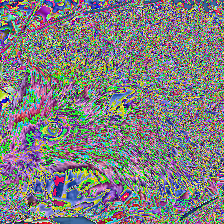

In [19]:
from torchvision.transforms import ToPILImage

ToPILImage()(preproc_img)

### 6.5.5 Inference

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

In [20]:
mini_batch = preproc_img.unsqueeze(0)
mini_batch.shape

torch.Size([1, 3, 224, 224])

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch4/logits.png)
    
   
![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch4/logits_probs.png)

In [21]:
#The model is in training mode by default (this is why it wrongly predicts the Norfolk Terrier)
logits = model(preproc_img.unsqueeze(0))
highest_logit = logits.argmax(axis=1)

highest_logit, categories[highest_logit]

(tensor([185]), 'Norfolk terrier')

In [22]:
model.eval()
logits = model(preproc_img.unsqueeze(0))
highest_logit = logits.argmax(axis=1)

highest_logit, categories[highest_logit]

(tensor([334]), 'porcupine')

#### 6.5.5.1 Probabilities

In [23]:
import torch.nn.functional as F
probabilities = F.softmax(logits, dim=-1)
probabilities.shape, probabilities.sum(dim=-1)

(torch.Size([1, 1000]), tensor([1.0000], grad_fn=<SumBackward1>))

In [24]:
values, indices = torch.topk(probabilities, k=1)
values, indices

(tensor([[0.3559]], grad_fn=<TopkBackward0>), tensor([[334]]))

In [25]:
categories[indices[0]]

'porcupine'

## 6.6 Dropout
    
![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [26]:
import torch.nn as nn

dropping_model = nn.Sequential(nn.Dropout(p=0.5))

In [27]:
random_input = torch.randn(10)
random_input

tensor([-0.9736, -0.0428, -0.9353, -0.7362,  1.1543, -1.4263,  0.6747, -0.3589,
        -1.6938, -0.3310])

In [28]:
dropping_model.train()
output_train = dropping_model(random_input)
output_train

tensor([-1.9472, -0.0855, -0.0000, -0.0000,  0.0000, -0.0000,  1.3494, -0.7179,
        -3.3876, -0.0000])

In [29]:
dropping_model.eval()
output_eval = dropping_model(random_input)
output_eval

tensor([-0.9736, -0.0428, -0.9353, -0.7362,  1.1543, -1.4263,  0.6747, -0.3589,
        -1.6938, -0.3310])

### 6.7 ImageFolder Dataset
    
![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step4.png)

We'll be using PyTorch's `ImageFolder` dataset, which is a very convenient way of building a dataset from a collection of images organized in folders, one for each category.

This is not a dataset itself, but a generic dataset that you can use with your own images provided that they are properly organized into sub-folders, with each sub-folder named after a class and containing the corresponding images:

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/[...]/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/[...]/asd932_.png
```

The `ImageFolder` dataset requires only the root folder, but it can take another four optional arguments:
- `transform`: You know that one already; it tells the dataset which transformations should be applied to each image
- `target_transform`: So far, our targets have always been integers, so this argument wouldn’t make sense; it starts making sense if your target is also an image (for instance, in a segmentation task)
- `loader`: A function that loads an image from a given path, in case you’re using weird or atypical formats that cannot be handled by PIL
- `is_valid_file`: A function that checks if a file is corrupted or not

### 6.7.1 ImageNet Dataset

Unfortunately the original ImageNet dataset isn't publicly available, only the original URLs to the images were published. If you're a researcher, though, it is possible to request access to versions of this dataset.

### 6.7.2 Downloading and Saving Images

The function below, inspired by Nate Raw's [HuggingPics](https://github.com/nateraw/huggingpics) project, uses HuggingFace's experimental search API to retrieve and save images files to the disk.

**UPDATE**: Unfortunately, the experimental API isn't open anymore. To programatically retrieve images using the function below, we suggest using a different free API such as [Pixabay](https://pixabay.com/api/docs/) (although free, you still need to signup to get your own key).

In [30]:
import os
import requests
from io import BytesIO
from PIL import Image

os.environ['PIXABAY_KEY'] = '<INSERT YOUR PIXABAY KEY HERE>'

def save_images(folder, search_term, count=10):
    if not os.path.exists(folder):
        os.mkdir(folder)

#     SEARCH_URL = "https://huggingface.co/api/experimental/images/search"
#     params = {"q": search_term, "license": "public", "imageType": "photo", "count": count}

    SEARCH_URL = "https://pixabay.com/api/"
    params = {"q": search_term.replace(' ', '+'),
              "image_type": "photo",
              "per_page": count,
              "page": 1,
              "key": os.environ["PIXABAY_KEY"]}

    resp = requests.get(SEARCH_URL, params=params)
    if resp.status_code == 200:
#         content = resp.json()['value']
#         urls = [img['thumbnailUrl'] for img in content]
        content = resp.json()['hits']
        urls = [img['previewURL'] for img in content]

        folder = os.path.join(folder, search_term)
        if not os.path.exists(folder):
            os.mkdir(folder)

        i = 0
        for url in urls:
            try:
                img = get_image_from_url(url)
                fname = os.path.join(folder, f'{i}.jpg')
                img.save(fname)
                i += 1
            except Exception:
                pass
        print(f'Retrieved {i} images for {search_term}')
    else:
        print(f'Failed to retrieve URLs for {search_term}')

In [31]:
targets = ['hedgehog', 'ostrich', 'armadillo']

for term in targets:
    save_images('./animals', term)

Failed to retrieve URLs for hedgehog
Failed to retrieve URLs for ostrich
Failed to retrieve URLs for armadillo


If you prefer not to signup for an API key, you may download some small images directly from the following link:

- `https://github.com/dvgodoy/assets/raw/main/PyTorchInPractice/data/animals.zip`

In [32]:
# !wget https://github.com/dvgodoy/assets/raw/main/PyTorchInPractice/data/animals.zip
# !unzip animals.zip

In [33]:
!ls -l ./animals

total 0


In [ ]:
!ls -l ./animals/armadillo

total 480
-rw-r--r-- 1 root root 38291 Jul 20 19:10 0.jpg
-rw-r--r-- 1 root root  7458 Jul 20 19:10 1.jpg
-rw-r--r-- 1 root root 41981 Jul 20 19:10 2.jpg
-rw-r--r-- 1 root root 41132 Jul 20 19:10 3.jpg
-rw-r--r-- 1 root root 51142 Jul 20 19:10 4.jpg
-rw-r--r-- 1 root root 59301 Jul 20 19:10 5.jpg
-rw-r--r-- 1 root root 41383 Jul 20 19:10 6.jpg
-rw-r--r-- 1 root root 73822 Jul 20 19:10 7.jpg
-rw-r--r-- 1 root root 58300 Jul 20 19:10 8.jpg
-rw-r--r-- 1 root root 51982 Jul 20 19:10 9.jpg


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.models import get_weight

weights = get_weight('ResNet50_Weights.DEFAULT')
transforms_fn = weights.transforms()

dataset = ImageFolder('./animals', transform=transforms_fn)
targets = dataset.classes

In [ ]:
dataset, targets

(Dataset ImageFolder
     Number of datapoints: 30
     Root location: ./animals
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[232]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BILINEAR
            ),
 ['armadillo', 'hedgehog', 'ostrich'])

In [ ]:
x, y = dataset[0]
targets[y], x

('armadillo',
 tensor([[[ 0.0227, -0.0287, -0.0972,  ..., -0.8335, -0.9020, -0.9192],
          [-0.0116, -0.0629, -0.1314,  ..., -0.7822, -0.8507, -0.8849],
          [ 0.0227, -0.0801, -0.1828,  ..., -0.6623, -0.7137, -0.7993],
          ...,
          [ 0.2282,  0.2282,  0.3652,  ..., -0.8849, -0.5253, -0.5424],
          [ 0.5193,  0.6049,  0.6392,  ..., -0.3712, -0.3712, -0.4397],
          [ 0.5193,  0.7933,  0.8447,  ...,  0.0056, -0.1314, -0.1999]],
 
         [[-0.2150, -0.2675, -0.3375,  ..., -0.9153, -0.9678, -0.9853],
          [-0.2500, -0.3025, -0.3725,  ..., -0.8627, -0.9153, -0.9503],
          [-0.2150, -0.3200, -0.4251,  ..., -0.7402, -0.7752, -0.8627],
          ...,
          [-0.0749, -0.1275, -0.0399,  ..., -0.8627, -0.5301, -0.5476],
          [ 0.1176,  0.1527,  0.1352,  ..., -0.5126, -0.5301, -0.5826],
          [ 0.0301,  0.2752,  0.2927,  ..., -0.2675, -0.3725, -0.4426]],
 
         [[-0.2881, -0.3404, -0.4101,  ..., -0.8981, -0.9156, -0.9330],
          [-0.

In [ ]:
model.eval()
mini_batch = x.unsqueeze(0)

logits = model(mini_batch)
pred_idx = logits.argmax(dim=1)

categories[pred_idx]

'armadillo'